<a href="https://colab.research.google.com/github/ChahatUpadhyay/Deep_Learning/blob/main/Projects/DL_Project_5_Face_mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset
# https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data		       kaggle.json  WIN_20240417_11_45_44_Pro.jpg  WIN_20250126_16_32_13_Pro.jpg
face-mask-dataset.zip  sample_data  WIN_20250126_16_32_01_Pro.jpg  WIN_20250126_16_32_48_Pro.jpg


In [ ]:
!ls

data		       kaggle.json  WIN_20240417_11_45_44_Pro.jpg  WIN_20250126_16_32_13_Pro.jpg
face-mask-dataset.zip  sample_data  WIN_20250126_16_32_01_Pro.jpg  WIN_20250126_16_32_48_Pro.jpg


In [ ]:
# importing OS for easy acess
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
#mask wali
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_54.jpg', 'with_mask_2623.jpg', 'with_mask_395.jpg', 'with_mask_701.jpg', 'with_mask_915.jpg']
['with_mask_1290.jpg', 'with_mask_2399.jpg', 'with_mask_182.jpg', 'with_mask_3180.jpg', 'with_mask_2556.jpg']


In [ ]:
# without mask wali
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3193.jpg', 'without_mask_634.jpg', 'without_mask_3530.jpg', 'without_mask_2328.jpg', 'without_mask_3391.jpg']
['without_mask_2903.jpg', 'without_mask_814.jpg', 'without_mask_796.jpg', 'without_mask_2762.jpg', 'without_mask_1886.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# lable encoding

# creating the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


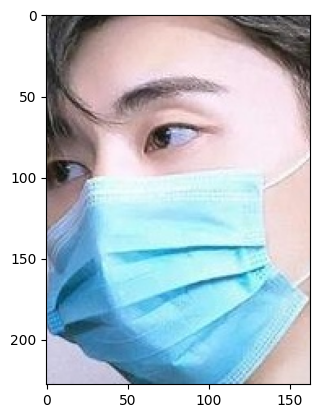

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

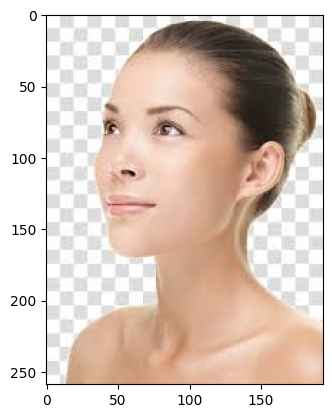

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#resizing images
with_mask_paths='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_paths+img_file)
  image=image.resize((128,128))
  # image =image.convert('L')#trying model with greyscale
  image =image.convert('L')
  image=np.array(image)
  data.append(image)

without_mask_paths='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_paths+img_file)
  image=image.resize((128,128))
  # image =image.convert('L')#trying model with greyscale
  image =image.convert('L')
  image=np.array(image)
  data.append(image)



/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
import random
combined = list(zip(data, label))
random.shuffle(combined)

data, label = zip(*combined)

data = list(data)
label = list(label)


In [ ]:
type(data)
len(data)
data[0]
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128)
(7553,)


In [ ]:
#train test split
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128) (6042, 128, 128) (1511, 128, 128)


array([[251, 252, 251, ..., 255, 255, 255],
       [248, 238, 237, ..., 255, 255, 255],
       [240, 216, 217, ..., 255, 255, 255],
       ...,
       [248, 219, 185, ..., 194, 184, 195],
       [248, 232, 199, ..., 187, 182, 201],
       [249, 234, 222, ..., 199, 211, 231]], dtype=uint8)
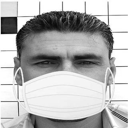

In [ ]:
X_train[0]
# 0 to 255 RGB color
# 0 is white
# 255 is black

In [ ]:
# scaling down the data to 0 to 1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[0.98431373, 0.98823529, 0.98431373, ..., 1.        , 1.        ,
        1.        ],
       [0.97254902, 0.93333333, 0.92941176, ..., 1.        , 1.        ,
        1.        ],
       [0.94117647, 0.84705882, 0.85098039, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.97254902, 0.85882353, 0.7254902 , ..., 0.76078431, 0.72156863,
        0.76470588],
       [0.97254902, 0.90980392, 0.78039216, ..., 0.73333333, 0.71372549,
        0.78823529],
       [0.97647059, 0.91764706, 0.87058824, ..., 0.78039216, 0.82745098,
        0.90588235]])

In [ ]:
# building a model
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(48, kernel_size=(3,3), activation='relu', input_shape=(128,128,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - acc: 0.5826 - loss: 0.7203 - val_acc: 0.6595 - val_loss: 0.6042
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.6987 - loss: 0.5667 - val_acc: 0.7702 - val_loss: 0.4850
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8034 - loss: 0.4440 - val_acc: 0.8413 - val_loss: 0.3841
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.8573 - loss: 0.3451 - val_acc: 0.8430 - val_loss: 0.3698
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8896 - loss: 0.2725 - val_acc: 0.8595 - val_loss: 0.3668


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8588 - loss: 0.3646
Test Accuracy = 0.8616809844970703


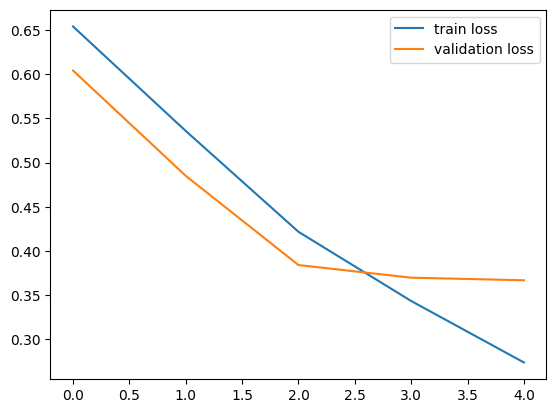

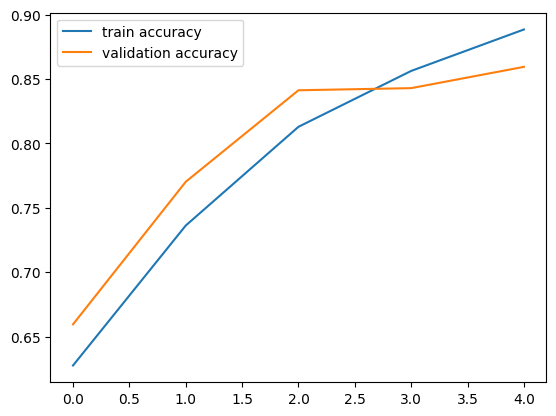

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/WIN_20240417_11_45_44_Pro.jpg


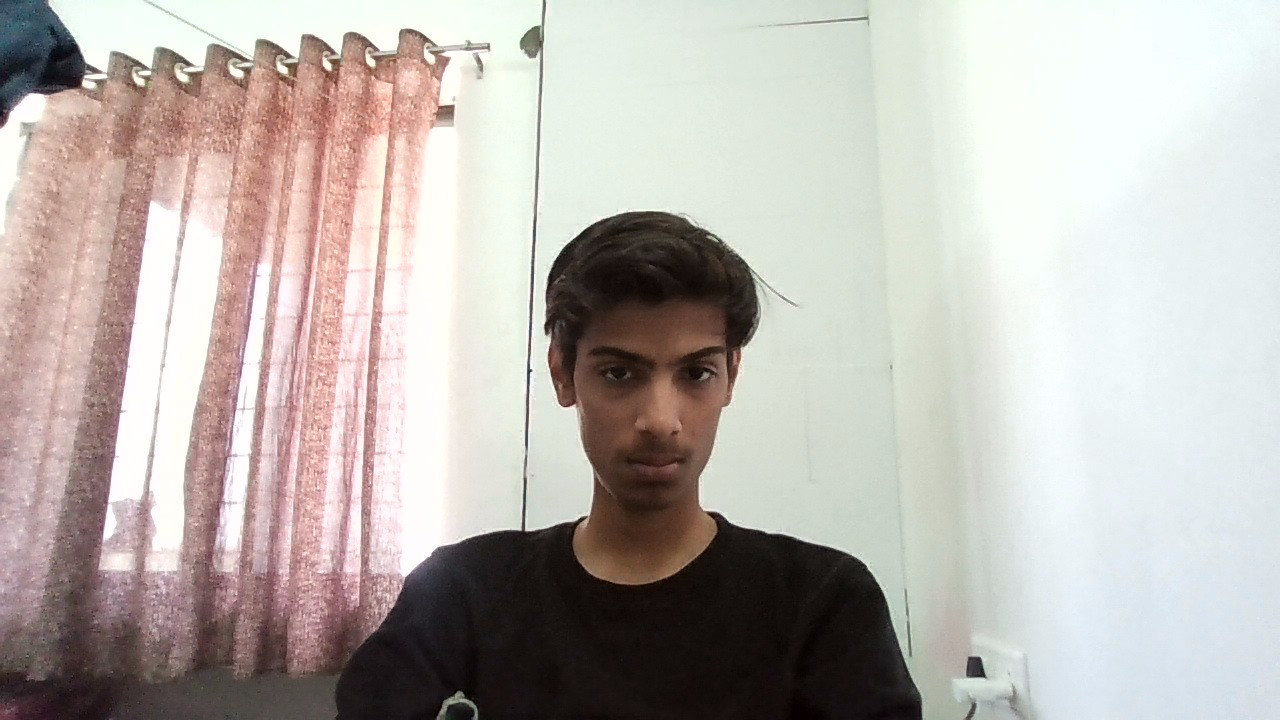

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
[[0.13392556 0.89433527]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

greyscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

input_image_resized = cv2.resize(greyscale_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,1])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')